# Web Mining and Applied NLP (44-620)

## Final Project:  Article Summarizer

### Student Name:  James Pinkston

#### GitHub:  https://github.com/james-0177/pinkston-p7-article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [ ]:
# Module 7 - Project 7:  Article Summarizer
# The following is a list of potential imports.

from collections import Counter
import json
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.6.15
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cloudpathlib              0.21.1
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.2
cycler                    0.12.1
cymem                     2.0.11
debugpy                   1.8.14
decorator                 5.2.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing     

### Q1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [13]:
import requests
import pickle
from bs4 import BeautifulSoup

url = "https://www.realcleardefense.com/articles/2025/04/08/navigating_a_changing_military_recruitment_environment_1102614.html"

headers = {
    "User-Agent":  "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Referer": "https://www.realcleardefense.com/",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "DNT": "1"  # Do Not Track
}

response = requests.get(url, headers=headers)
response.raise_for_status()

soup = BeautifulSoup(response.text, "html.parser")

article_div = soup.select_one("div.article-body-text.center")

if article_div:
    article_text = article_div.get_text(separator="\n", strip=True)

    unwanted_lines = {
        "X",
        "Story Stream",
        "recent articles",
        "Video: Global Warming Lorem Ipsum Dolor Sit ...",
        "Article: Global Warming Lorem Ipsum Dolor Sit ...",
        "Entry: Global Warming Lorem Ipsum Dolor Sit ..."
    }

    lines = article_text.split("\n")
    filtered = [line for line in lines if line not in unwanted_lines]
    article_text = "\n".join(filtered)
else:
    article_text = "Article content not found"

with open("article_text.pkl", "wb") as f:
    pickle.dump(article_text, f)

### Q2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [15]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from spacy.tokens import Doc
import pickle

nlp = spacy.load("en_core_web_sm")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

if not Doc.has_extension("polarity"):
    Doc.set_extension("polarity", getter=lambda doc: doc._.blob.polarity)
    
with open("article_text.pkl", "rb") as f:
    article_text = pickle.load(f)

doc = nlp(article_text)

print(f"Polarity Score:  {doc._.polarity:.3f}")

print(f"Number of Sentences:  {len(list(doc.sents))}")

Polarity Score:  0.063
Number of Sentences:  34


### Q3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [17]:
import spacy
from collections import Counter
import pickle

nlp = spacy.load("en_core_web_sm")

with open("article_text.pkl", "rb") as f:
    article_text = pickle.load(f)

doc = nlp(article_text)

tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

freq = Counter(tokens)

most_common = freq.most_common(5)

print("5 Most Frequent Tokens and Their Frequencies:")
for token, count in most_common:
    print(f"Token:  '{token}' - Frequency:  {count}")

5 Most Frequent Tokens and Their Frequencies:
Token:  'recruiting' - Frequency:  14
Token:  'military' - Frequency:  10
Token:  'recruits' - Frequency:  6
Token:  'research' - Frequency:  6
Token:  'services' - Frequency:  5


### Q4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [18]:
import spacy
from collections import Counter
import pickle

nlp = spacy.load("en_core_web_sm")

with open("article_text.pkl", "rb") as f:
    article_text = pickle.load(f)

doc = nlp(article_text)

lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

freq = Counter(lemmas)

most_common = freq.most_common(5)

print("5 Most Frequent Lemmas and Their Frequencies:")
for lemma, count in most_common:
    print(f"Lemma:  '{lemma}' - Frequency:  {count}")

5 Most Frequent Lemmas and Their Frequencies:
Lemma:  'recruit' - Frequency:  11
Lemma:  'recruiting' - Frequency:  11
Lemma:  'military' - Frequency:  10
Lemma:  'meet' - Frequency:  9
Lemma:  'service' - Frequency:  6


### Q5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

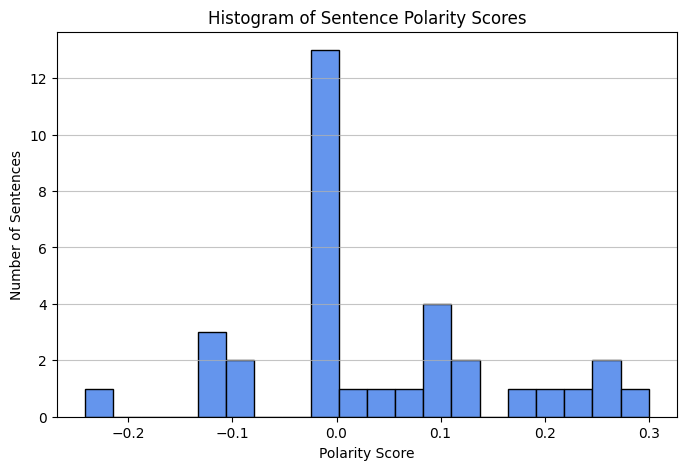

In [24]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

with open("article_text.pkl", "rb") as f:
    article_text = pickle.load(f)

doc = nlp(article_text)

sentence_scores = [sent._.blob.polarity for sent in doc.sents]

plt.figure(figsize=(8, 5))
plt.hist(sentence_scores, bins = 20, color='cornflowerblue', edgecolor='black')
plt.title("Histogram of Sentence Polarity Scores")
plt.xlabel("Polarity Score")
plt.ylabel("Number of Sentences")
plt.grid(axis="y", alpha=0.75)
plt.show()

# The most common range of polarity scores appears to be between -0.1 and 0.1, indicating that
# most sentences have a very slight negative to slightly positive sentiment.

### Q6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

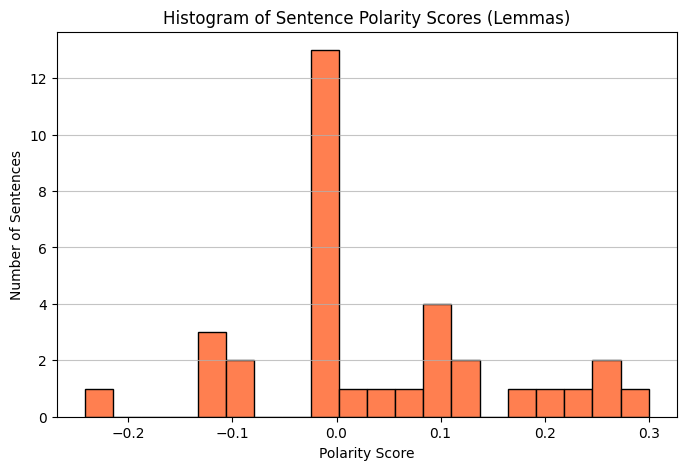

In [30]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
import matplotlib.pyplot as plt
from spacy.tokens import Doc

nlp = spacy.load("en_core_web_sm")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

with open("article_text.pkl", "rb") as f:
    article_text = pickle.load(f)

doc = nlp(article_text)

sentence_lemma_scores = []

for sent in doc.sents:
    lemmas = [token.lemma_ for token in sent if not token.is_punct and not token.is_space]
    lemma_sentence = " ".join(lemmas)
    lemma_doc = nlp(lemma_sentence)
    sentence_lemma_scores.append(lemma_doc._.blob.polarity)

plt.figure(figsize=(8, 5))
plt.hist(sentence_scores, bins = 20, color='coral', edgecolor='black')
plt.title("Histogram of Sentence Polarity Scores (Lemmas)")
plt.xlabel("Polarity Score")
plt.ylabel("Number of Sentences")
plt.grid(axis="y", alpha=0.75)
plt.show()

# The most common range of polarity scores appears to be between -0.1 and 0.1, indicating that
# most sentences have a very slight negative to slightly positive sentiment when analyzed using lemmas.

### Q7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens):  0.1 
* Cutoff Score (lemmas):  0.1

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

### Q8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [3]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle

nlp = spacy.load("en_core_web_sm")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

with open("article_text.pkl", "rb") as f:
    article_text = pickle.load(f)

doc = nlp(article_text)

cutoff_token = 0.1

summary_sentences = []

for sent in doc.sents:
    if sent._.blob.polarity > cutoff_token:
        summary_sentences.append(sent.text.strip())

summary_text = ' '.join(summary_sentences)

with open("summary_text.pkl", "wb") as f:
    pickle.dump(summary_text, f)

print("Summary based on token polarity scores > 0.1:\n")
print(summary_text)

Summary based on token polarity scores > 0.1:

In a significant shift, last year saw gains in military recruiting across the services and most met their recruiting goals for the first time in years. As of Fiscal Year 2024, all branches of the U.S. military, except the Navy, have successfully met their active duty enlisted recruiting missions. As FY 2025 unfolds, the Army, Navy, and Marine Corps are not only meeting but exceeding their recruiting missions as of December, the latest month for which data is available. A significant legislative change is also relevant: Congress increased military pay by 4.5% in January, with junior enlisted members receiving an additional 10% pay raise this April. Concerns have been raised about the increased use of waivers and higher first-term attrition rates. However, RAND research indicates that first-term attrition has not historically been higher among recruits with waivers, except for those with drug or alcohol waivers. Only the Air Force, Space For

### Q9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [4]:
import pickle

with open("summary_text.pkl", "rb") as f:
    summary_text = pickle.load(f)

summary_doc = nlp(summary_text)
summary_polarity = summary_doc._.blob.polarity
num_sentences = len(list(summary_doc.sents))

print(f"Summary Polarity Score:  {summary_polarity:.3f}")
print(f"Number of Sentences in the Summary:  {num_sentences}")

Summary Polarity Score:  0.213
Number of Sentences in the Summary:  8


### Q10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [5]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle

nlp = spacy.load("en_core_web_sm")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

with open("article_text.pkl", "rb") as f:
    article_text = pickle.load(f)

doc = nlp(article_text)

cutoff_lemma = 0.1

summary_sentences_lemma = []

for sent in doc.sents:
    lemmas = [token.lemma_ for token in sent if not token.is_punct and not token.is_space]
    lemma_sentence = " ".join(lemmas)
    lemma_doc = nlp(lemma_sentence)
    if lemma_doc._.blob.polarity > cutoff_lemma:
        summary_sentences_lemma.append(sent.text.strip())

summary_text_lemma = ' '.join(summary_sentences_lemma)

with open("summary_text_lemma.pkl", "wb") as f:
    pickle.dump(summary_text_lemma, f)

print("Summary based on lemma polarity scores > 0.1:\n")
print(summary_text_lemma)

Summary based on lemma polarity scores > 0.1:

While there is no question the American military faces persistent challenges in attracting qualified recruits, the much-discussed recruiting crisis that has dogged most service branches in recent years appears to be easing. In a significant shift, last year saw gains in military recruiting across the services and most met their recruiting goals for the first time in years. As of Fiscal Year 2024, all branches of the U.S. military, except the Navy, have successfully met their active duty enlisted recruiting missions. A significant legislative change is also relevant: Congress increased military pay by 4.5% in January, with junior enlisted members receiving an additional 10% pay raise this April. Concerns have been raised about the increased use of waivers and higher first-term attrition rates. Moreover, first-term attrition appears to be below historic levels in the Army. Only the Air Force, Space Force, and Marine Corps have consistently m

### Q11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [6]:
import pickle

with open("summary_text_lemma.pkl", "rb") as f:
    summary_text_lemma = pickle.load(f)

summary_doc_lemma = nlp(summary_text_lemma)
summary_polarity_lemma = summary_doc_lemma._.blob.polarity
num_sentences_lemma = len(list(summary_doc_lemma.sents))

print(f"Summary Polarity Score (Lemmas):  {summary_polarity_lemma:.3f}")
print(f"Number of Sentences in the Summary (Lemmas):  {num_sentences_lemma}")

Summary Polarity Score (Lemmas):  0.180
Number of Sentences in the Summary (Lemmas):  8


### Q12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.

The polarity scores of both the token-based (0.213) and lemma-based (0.180) summaries are noticeably higher (more positive) than the polarity score of the original article (0.063). This indicates that the summaries tend to focus on sentences with more positive sentiment, likely because of the cutoff thresholds I applied when selecting sentences. The original article tries to maintain a neutral stance, and does a good job of that based on what the histograms show.

### Q13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I think the token-based summary is better because it captures the original tone, even if more positive, and focuses on key topics within the article. Also, while the lemma-based summary is similar in content and tone, it is less accurate since it is based on simplified versions of the original words within the sentences.